In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# display plots in Jupyter Notebooks
%matplotlib inline
# make this notebook's output stable across runs
n = np.random.seed(42)

In [2]:
# Load the dataset
data = pd.read_csv('solar_plant.csv')

In [3]:
data.head()

,Time,SolarIrradiance_W/m^2,PanelTemperature_C,EnergyGenerated_kWh
0,2024-08-25 00:00:00,0.0,15.798492,18.594361
1,2024-08-25 01:00:00,0.0,15.000000,0.000000
2,2024-08-25 02:00:00,0.0,15.000000,0.000000
3,2024-08-25 03:00:00,0.0,15.000000,6.648442
4,2024-08-25 04:00:00,0.0,15.000000,2.292918


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   100 non-null    object 
 1   SolarIrradiance_W/m^2  100 non-null    float64
 2   PanelTemperature_C     100 non-null    float64
 3   EnergyGenerated_kWh    100 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.3+ KB


In [5]:
# Preprocess the data
data['Time'] = pd.to_datetime(data['Time']).dt.hour
data['SolarIrradiance_W/m^2'] = data['SolarIrradiance_W/m^2'].round(2)
data['PanelTemperature_C'] = data['PanelTemperature_C'].round(0).astype(int)
data['EnergyGenerated_kWh'] = data['EnergyGenerated_kWh'].round(2)

In [6]:
data.head()

,Time,SolarIrradiance_W/m^2,PanelTemperature_C,EnergyGenerated_kWh
0,0,0.0,16,18.59
1,1,0.0,15,0.00
2,2,0.0,15,0.00
3,3,0.0,15,6.65
4,4,0.0,15,2.29


In [7]:
data.describe()

,Time,SolarIrradiance_W/m^2,PanelTemperature_C,EnergyGenerated_kWh
count,100.000000,100.000000,100.000000,100.000000
mean,11.100000,241.565600,18.340000,124.014800
std,7.098869,328.486508,4.247923,161.907688
min,0.000000,0.000000,15.000000,0.000000
25%,5.000000,0.000000,15.000000,0.915000
50%,11.000000,0.000000,16.000000,16.645000
75%,17.000000,491.592500,22.000000,240.990000
max,23.000000,1035.800000,28.000000,529.240000


In [8]:
data.describe(include='all')

,Time,SolarIrradiance_W/m^2,PanelTemperature_C,EnergyGenerated_kWh
count,100.000000,100.000000,100.000000,100.000000
mean,11.100000,241.565600,18.340000,124.014800
std,7.098869,328.486508,4.247923,161.907688
min,0.000000,0.000000,15.000000,0.000000
25%,5.000000,0.000000,15.000000,0.915000
50%,11.000000,0.000000,16.000000,16.645000
75%,17.000000,491.592500,22.000000,240.990000
max,23.000000,1035.800000,28.000000,529.240000


In [9]:
#compute pairwise correlation of columns
corr_matrix = data.corr()
corr_matrix

,Time,SolarIrradiance_W/m^2,PanelTemperature_C,EnergyGenerated_kWh
Time,1.000000,0.091383,0.086287,0.099789
SolarIrradiance_W/m^2,0.091383,1.000000,0.993514,0.998478
PanelTemperature_C,0.086287,0.993514,1.000000,0.991572
EnergyGenerated_kWh,0.099789,0.998478,0.991572,1.000000


In [10]:
corr_matrix["EnergyGenerated_kWh"]

Time                     0.099789
SolarIrradiance_W/m^2    0.998478
PanelTemperature_C       0.991572
EnergyGenerated_kWh      1.000000
Name: EnergyGenerated_kWh, dtype: float64

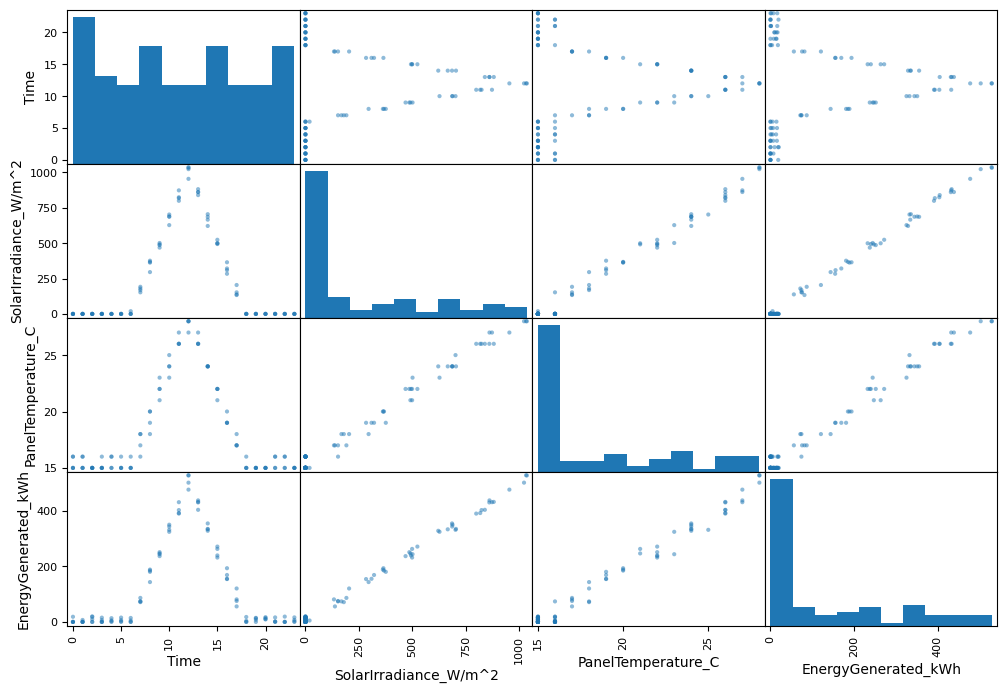

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["Time", "SolarIrradiance_W/m^2", "PanelTemperature_C","EnergyGenerated_kWh"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

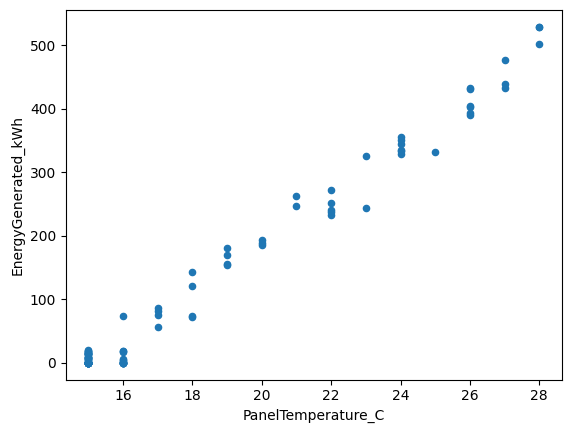

In [12]:
data.plot(kind="scatter", x="PanelTemperature_C", y="EnergyGenerated_kWh")
plt.show()

In [13]:
#machine leaning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#machine leanring input data transform libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#machine leanirng validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


## Split the data into a training and testing data set

In [15]:
#split the data into 80% train and 20% test
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [16]:
#keep data needed for each input 
x_train_set = train_set.drop("EnergyGenerated_kWh", axis=1)
x_test_set = test_set.drop("EnergyGenerated_kWh", axis=1)
y_train_set = train_set["EnergyGenerated_kWh"].copy()
y_test_set = test_set["EnergyGenerated_kWh"].copy()


## Scale the data

In [18]:
#normalize the data
scaler = StandardScaler()
scaler.fit(x_train_set)
x_train_scaled = scaler.transform(x_train_set)
scaler.fit(x_test_set)
x_test_scaled = scaler.transform(x_test_set)

In [19]:
x_test_set.head()

,Time,SolarIrradiance_W/m^2,PanelTemperature_C
83,11,823.93,26
53,5,0.00,16
70,22,0.00,15
45,21,0.00,15
44,20,0.00,15


In [20]:
x_test_scaled[1:5,:]

array([[-0.84122777, -0.63673938, -0.47966953],
       [ 1.58264885, -0.63673938, -0.73212717],
       [ 1.44006788, -0.63673938, -0.73212717],
       [ 1.2974869 , -0.63673938, -0.73212717]])

# Training Regression Models

### Linear Regression

In [21]:
#linear regression model
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train_set)
y_predictions_train = lin_reg.predict(x_train_scaled)

#training set linear regression scores
lin_mse_train = mean_squared_error(y_train_set, y_predictions_train)
lin_rmse_train = np.sqrt(lin_mse_train)
print("Linear Regression")
print("Training Set Error")
print("Mean Squared Error: ", lin_rmse_train)
lin_mae_train = mean_absolute_error(y_train_set, y_predictions_train)
print("Mean Absolute Error: ", lin_mae_train)


Linear Regression
Training Set Error
Mean Squared Error:  8.940139455490627
Mean Absolute Error:  7.551514228717505


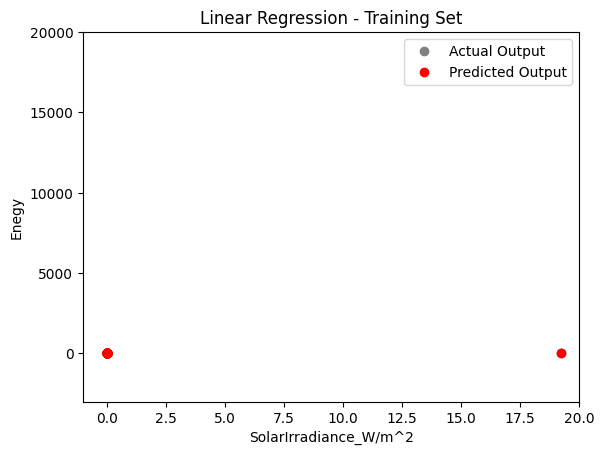

In [23]:
# Make the plot.
plt.clf()
plt.plot(x_train_set["SolarIrradiance_W/m^2"], y_train_set, 'o', color='grey', label = 'Actual Output')
plt.plot(x_train_set["SolarIrradiance_W/m^2"], y_predictions_train, 'o', color='red', label = 'Predicted Output')
plt.xlabel("SolarIrradiance_W/m^2")
plt.ylabel("Enegy")
plt.title("Linear Regression - Training Set")
plt.legend()
plt.ylim((-3000, 20000))
plt.xlim((-1,20))
plt.savefig("linear_regression_train_set.png")

### Polynomial Regression

In [24]:
# PolynomialFeatures (prepreprocessing) 
poly = PolynomialFeatures(degree=3)
X_train = poly.fit_transform(x_train_scaled)

#linear regression model
linpoly = LinearRegression()
linpoly.fit(X_train, y_train_set)
y_predictions_train = linpoly.predict(X_train)

#linear regression scores
linpoly_mse = mean_squared_error(y_train_set, y_predictions_train)
linpoly_rmse = np.sqrt(linpoly_mse)
print('Degree '+ str(poly.degree) +' Polynomial Regression')
print("Training Set Error")
print("Mean Squared Error: ", linpoly_rmse)
linpoly_mae = mean_absolute_error(y_train_set, y_predictions_train)
print("Mean Absolute Error: ", linpoly_mae)

Degree 3 Polynomial Regression
Training Set Error
Mean Squared Error:  8.17687187241264
Mean Absolute Error:  6.766689969237291


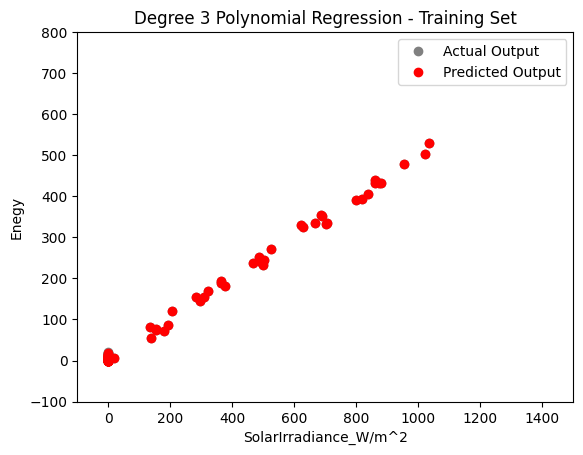

In [30]:
## Make the plot.
plt.clf()
plt.plot(x_train_set["SolarIrradiance_W/m^2"], y_train_set, 'o', color='grey', label = 'Actual Output')
plt.plot(x_train_set["SolarIrradiance_W/m^2"], y_predictions_train, 'o', color='red', label = 'Predicted Output')
plt.xlabel("SolarIrradiance_W/m^2")
plt.ylabel("Enegy")
plt.title('Degree '+ str(poly.degree) +' Polynomial Regression - Training Set')
plt.legend()
plt.ylim((-100, 800))
plt.xlim((-100,1500))
# plt.savefig("polynomial_regression_train_set.png")

### Decision Tree Regression

In [26]:
#Decision Tree model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train_set, y_train_set)
y_predictions_train = tree_reg.predict(x_train_set)

#Decision Tree regression scores
tree_mse = mean_squared_error(y_train_set, y_predictions_train)
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree Regression")
print("Training Set Error")
print("Mean Squared Error: ", tree_rmse)
tree_mae = mean_absolute_error(y_train_set, y_predictions_train)
print("Mean Absolute Error: ", tree_mae)

Decision Tree Regression
Training Set Error
Mean Squared Error:  3.847421222390395
Mean Absolute Error:  1.9416


(-100.0, 1500.0)

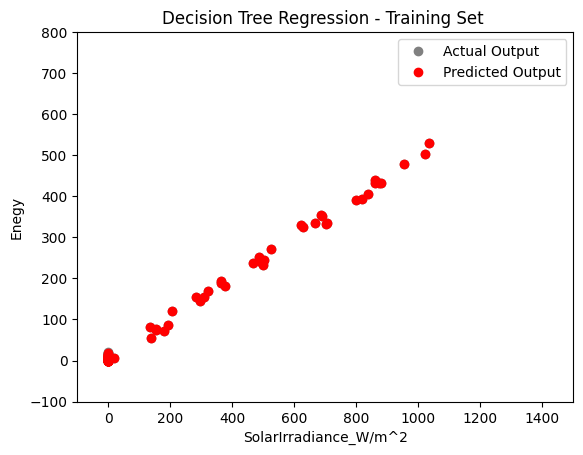

In [29]:
## Make the plot.
plt.clf()
plt.plot(x_train_set["SolarIrradiance_W/m^2"], y_train_set, 'o', color='grey', label = 'Actual Output')
plt.plot(x_train_set["SolarIrradiance_W/m^2"], y_predictions_train, 'o', color='red', label = 'Predicted Output')
plt.xlabel("SolarIrradiance_W/m^2")
plt.ylabel("Enegy")
plt.title("Decision Tree Regression - Training Set ")
plt.legend()
plt.ylim((-100, 800))
plt.xlim((-100,1500))
# plt.savefig("decision_tree_regression_train_set.png")

### Random Forest Regression

In [31]:
#Random Forest model
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train_set, y_train_set)
y_predictions_train = forest_reg.predict(x_train_set)

#Random Forest scores
forest_mse = mean_squared_error(y_train_set, y_predictions_train)
forest_rmse = np.sqrt(forest_mse)
print("Random Forrest Regression")
print("Training Set Error")
print("Mean Squared Error: ", forest_rmse)
forest_mae = mean_absolute_error(y_train_set, y_predictions_train)
print("Mean Absolute Error: ", forest_mae)

Random Forrest Regression
Training Set Error
Mean Squared Error:  5.910929144488851
Mean Absolute Error:  4.722883056547607


In [ ]:
## Make the plot.
plt.clf()
plt.plot(x_train_set["SolarIrradiance_W/m^2"], y_train_set, 'o', color='grey', label = 'Actual Output')
plt.plot(x_train_set["SolarIrradiance_W/m^2"], y_predictions_train, 'o', color='red', label = 'Predicted Output')
plt.xlabel("Speed")
plt.ylabel("Enegy")
plt.title("Random Forest Regression - Training Set")
plt.legend()
plt.ylim((-100, 800))
plt.xlim((-100,1500))
plt.savefig("random_forest_regression_train_set.png")